## Preprocessing

In [34]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
#  Import and read the charity_data.csv.
import pandas as pd 
from keras.callbacks import ModelCheckpoint
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [35]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE

application_df = application_df.drop('EIN', axis=1)
application_df = application_df.drop('NAME', axis=1)

In [36]:
application_df.shape

(34299, 10)

In [37]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [38]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
count = application_df.nunique()

In [39]:
count

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [40]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [41]:
application_types_to_replace = ['T9','T13','T12','T2','T25','T14','T29','T15','T17']

In [42]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [43]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [44]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1] 

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [45]:
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x==1] 

C2190    1
C4200    1
C2600    1
C5200    1
C1370    1
C1248    1
C6100    1
C1820    1
C1900    1
C1236    1
C3700    1
C2570    1
C1580    1
C1245    1
C2500    1
C1570    1
C1283    1
C2380    1
C1732    1
C1728    1
C2170    1
C4120    1
C8210    1
C2561    1
C4500    1
C2150    1
Name: CLASSIFICATION, dtype: int64

In [46]:
classifications_to_replace = application_df['CLASSIFICATION'].value_counts().loc[lambda x : x<1883].index.tolist()

In [47]:
classifications_to_replace

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [48]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [49]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [50]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [51]:
application_df['IS_SUCCESSFUL'].unique()

array([1, 0], dtype=int64)

In [52]:
len(application_df)

34299

In [53]:
application_df2 = application_df.drop('IS_SUCCESSFUL', axis=1)

In [54]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
x = pd.get_dummies(application_df2)

x.head(5)

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [55]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

y = application_df['IS_SUCCESSFUL'].values
x = x.values

In [56]:
x

array([[       1,     5000,        0, ...,        0,        1,        0],
       [       1,   108590,        0, ...,        0,        1,        0],
       [       1,     5000,        0, ...,        0,        1,        0],
       ...,
       [       1,     5000,        0, ...,        0,        1,        0],
       [       1,     5000,        0, ...,        0,        1,        0],
       [       1, 36500179,        0, ...,        0,        1,        0]],
      dtype=int64)

In [57]:
len(y)

34299

In [58]:


# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=78)

In [59]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

## Compile, Train and Evaluate the Model

In [60]:
number_input_features = len(x_train[0])

In [61]:
number_input_features

43

In [62]:
number_input_features = len(x_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [64]:
# Train the model
fit_model = nn.fit(x_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5710 - accuracy: 0.7207
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.7308
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5518 - accuracy: 0.7309
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7329
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5490 - accuracy: 0.7340
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5481 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7347
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7345
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5462 - accura

804/804 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7406
Epoch 82/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7411
Epoch 83/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7407
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.7405
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5367 - accuracy: 0.7408
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7409
Epoch 87/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7407
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.7406
Epoch 89/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.7406
Epoch 90/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 

In [65]:
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5572 - accuracy: 0.7250 - 326ms/epoch - 1ms/step
Loss: 0.5571689009666443, Accuracy: 0.7250145673751831


# Checking for a better model

In [67]:
number_input_features = len(x_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3520      
                                                                 
 dense_7 (Dense)             (None, 40)                3240      
                                                                 
 dense_8 (Dense)             (None, 20)                820       
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7,601
Trainable params: 7,601
Non-trainable params: 0
_________________________________________________________________


In [68]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [69]:
fit_model = nn.fit(x_train_scaled,y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5697 - accuracy: 0.7210
Epoch 2/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7302
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7334
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5502 - accuracy: 0.7334
Epoch 5/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5487 - accuracy: 0.7343
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5478 - accuracy: 0.7342
Epoch 7/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7345
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7355
Epoch 9/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7358
Epoch 10/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5459 - accura

804/804 [==============================] - 1s 2ms/step - loss: 0.5354 - accuracy: 0.7416
Epoch 82/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5360 - accuracy: 0.7412
Epoch 83/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5354 - accuracy: 0.7417
Epoch 84/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5361 - accuracy: 0.7410
Epoch 85/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.7408
Epoch 86/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5353 - accuracy: 0.7417
Epoch 87/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5352 - accuracy: 0.7416
Epoch 88/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7409
Epoch 89/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5350 - accuracy: 0.7416
Epoch 90/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 

804/804 [==============================] - 1s 2ms/step - loss: 0.5329 - accuracy: 0.7423
Epoch 161/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7418
Epoch 162/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5325 - accuracy: 0.7419
Epoch 163/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5328 - accuracy: 0.7424
Epoch 164/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7421
Epoch 165/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7420
Epoch 166/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7424
Epoch 167/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7421
Epoch 168/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7422
Epoch 169/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5329 - a

In [70]:
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5714 - accuracy: 0.7241 - 496ms/epoch - 2ms/step
Loss: 0.5714465379714966, Accuracy: 0.7240816354751587


In [71]:
number_input_features = len(x_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                3520      
                                                                 
 dense_11 (Dense)            (None, 30)                2430      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [72]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(x_train_scaled,y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5948 - accuracy: 0.7054
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5727 - accuracy: 0.7235
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5677 - accuracy: 0.7264
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5621 - accuracy: 0.7281
Epoch 5/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.7290
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7300
Epoch 7/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7294
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7306
Epoch 9/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7298
Epoch 10/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5521 - accura

804/804 [==============================] - 1s 2ms/step - loss: 0.5373 - accuracy: 0.7402
Epoch 82/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5377 - accuracy: 0.7401
Epoch 83/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5374 - accuracy: 0.7394: 0s - loss: 0
Epoch 84/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.7394
Epoch 85/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5373 - accuracy: 0.7395
Epoch 86/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5369 - accuracy: 0.7401
Epoch 87/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5367 - accuracy: 0.7407
Epoch 88/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.7396
Epoch 89/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5372 - accuracy: 0.7399
Epoch 90/200
804/804 [==============================] - 1s 2ms/step - loss: 0.536

804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7415
Epoch 161/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7425
Epoch 162/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7413
Epoch 163/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7416
Epoch 164/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5332 - accuracy: 0.7418
Epoch 165/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7416
Epoch 166/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7420
Epoch 167/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7420
Epoch 168/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5325 - accuracy: 0.7425
Epoch 169/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5329 - a

In [73]:
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5610 - accuracy: 0.7268 - 379ms/epoch - 1ms/step
Loss: 0.5609973669052124, Accuracy: 0.7267638444900513


In [74]:
#looking at the big differences in this feature of Ask amount it prompt me to think that there would be some outliers 
#that may need to be removed in order to improve the model

In [75]:

application_df['ASK_AMT'].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [76]:
amts = application_df['ASK_AMT'].values

In [77]:
import numpy as np
import matplotlib.pyplot as plt

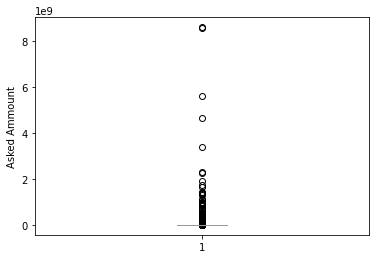

In [78]:
# Example outlier plot of reaction times
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Asked Ammount')
ax1.boxplot(amts)
plt.show()


In [79]:
application_df['ASK_AMT'].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [80]:
quartiles = np.quantile(amts,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [print(time) if time < lower_bound or time > upper_bound else next for time in amts]

108590
142590
31452
7508025
94389
69656
165593
86380556
376109
318296
44004
323466
709815
1329410
31613
1549352
577113
44623
64868
131620
306133
66916
236206
393704
9955466
94869
36607
484855
137272
101980
4410503
15477
24211
638229
20520
34879
205120
12829
452970
72961
12860
696502
259589
49112
86584
4108874
25175802
132449
73686
723426
521883
855350
370941
1728949
287332
1790960
23799
201655
27285052
74643
640921
2705244
2770474
61686
1064584
25736
17512616
39064
67654
139694
212362
87981
16027
1066994
107484
20380
293732
2471994
2793433
324268
343650
497726
28993
118358
2257305
64723
403069
329188
180240
47901
23322
102050
25846
10935786
1562336
281725
122937
12753
410463
38286
22527
47129
966422
718228
2461713
876484
14698
110885
64075
78769
2908673
216643
16221
140950
3676333
30079
98931
12509
20770
118386
120281
71609
155956
176563
977905
64035
34914
1019926
1202409
540615
2205817
13201
70786
43808
240757
27001
49983
90657
36355
22840
215957
805021
2238748
13541
410489
340393
195

138423
413761
310009
1018406
168922
43226
12026
64384
155619
61521
40138
50087
94055
20261
70743
117619
67153
131130
140630
33987
24105
303958
176954
141377
20071
81722
15568
480212
335772
99982
2543496
103375
60291
18068
47760
113260
103403
1059109
455608
32717
2043742
62809
191497
69257
73560
66527
28536
83866
69200
17195
62950
233969
63598
371751
323665
20804
58190
167280
16109
6162396
830297
14902781
35185
80447
163732
1176608
35366
20340
22186
1353449
34135
955652
445500
229194
63560
26585
1301428
149061
44889
333775
141830
76474
1102933
102826
137567
16303
224749
38957
1375692
6865255
157471
256521
13931
49054
393407
32365573
66476
478556
710536
36860
73725
274253
56846
44523
154939
63722
156093
446013
136909
21481
35416
31230
31807
31875
77752
243918
50123
75363
1239549
64174
128358
25518
132932
59143
54024
280970
51358
18496
57761
155416
427767
52971
14118610
261942
31633
11918
272030
26475
59899
1417765
1056397
1500508
1116861
2519934
2440092
227133
3729734
15871
3789296
30911

146668
36484
3307241
16698
68133
26840
19402
26211
18600
7585286
15642
489140
53641
75568
160872
39071
18972
13389
918370
72418
86506
25378
259096300
20150
132724
47594
34917
1304691
1663012
419716
23216
158148
5374725
38798
1794599
22893
207659
40508
18394
95065
252433
43646
73010
3072903
121072
14000
2002155
19801
886834
27536
32898
37863
1087416
83167
12584
37204
136341
14939
17402
13992
37390
47597
520896
20051
17832
164086
46244
105123
12889
33394
32764
119873
638353
622359
178240
46991
83796
35897
308968
16191
15523
21382
22544
375083
79373
131180
26264
63819
45437
42779
29441
24574
18148
115673
228953
234032
87225
2989328
108685
63840
16274
570335
193466
74368
61845
15706
39863
138638
804257
501749
7271299
26134
2199779
166451
899569
417379
1574739
170076
200256
38720
620051
16482
13685
121590
597285
132958
50504
2681491
392574
72221
48610
32547
178814
12779
63803
95361
106438
188648
55218
34827
59352
103714
669099
31682
19306
45793
36644
67237
54025
24485
116920
477133
20611
26

228508
899000
97335
288230
83830
184668
195661
46802
77520
23057
606084
13750986
3625846
1742249
516931
1095854
334370
41669
184350
16377
159144
59711
73393
26039
910740
62384
3519102
16219
436629
1626852
20084
14721076
354953
9163014
39796625
1932868
2083587
1207712
860312990
1090186
633380
12839230
411677
85640684
40735
24289
1485967
6249193
177139
974156
4681154
78038
744939
2120337
1540263
43340
378909
37834
22540
248003651
31103347
535121
40919
85537
1382280715
59277
67873
324248
3140072
49937
82970
2626011
829474
15553300
20385
154287
2185063
88289
43500
89991
861578
1653666
68055
19810
182135
2323303
16307
521982
613835
410495
74350
268551
25950
48753
30799
9274771
191200
3615031
4548010
1783670
2803638
798417
54684478
126612
4933535
487148
429862
72264
34280
198157
29270
20537
488837
228714
530777
43380
256768
137625426
103940
31359
95380
100955
5483389
62913
42355
2285647
200923
29512
1920952
1357207
103232
222743
1436586
110988
15919
325425
13070
56692
971080
118786
81558
259

1887521
2033452
38563
783855
220275
115002626
80794
67881
25627
93063
7947501
21077
451486
13446012
276838
16613
552207
107637
269468
11935
1287508
36791
257878
352405
90247
39122
149462
24746
1729424
4388466
52593
347130
24047
320975
8744690
281878
318359
29917
42178
142866
13681
112058
22819
22035
54698
17112
36864
1453985
219314
2194606
16710
83211
1004889
203746
44773
14171
18246
126806
25434
52339
1591782
2773500
36713
3501737
118596
29133
30244
75548
42778
203246
37504
4546642
16815167
709957
41170603
197923
27530769
21063
16148
72151
739587
1440545
35116
4861597
155883
36683
5657053
1369936
1764073
81448
25724
2335783
1175553
79839
492131
38360
294584
133334
4847691
342426
24199
19906
79988
1661605
19167
199595
17960
26432
50957
695914
129546
25812
50630
288730
190994
77825
44816
240076
184238
64264
116551
2290949
29612
33819
49521
123714
6828159
615080
495803
1443006
31835
124516
164388
311334
466338
52034
29837
54134
41250
282520
74571
861804
164629
33883
14120
47286
199115
47

In [81]:
lower_bound

887.0

In [82]:
upper_bound

11855.0

In [83]:
New_x = application_df.loc[(application_df['ASK_AMT'] > 887) & (application_df['ASK_AMT'] < 11855) ]


In [84]:
len(application_df)

34299

In [85]:
len(New_x)

26093

In [86]:
New_x2 = New_x.drop('IS_SUCCESSFUL', axis=1)

In [87]:
x = pd.get_dummies(New_x2)

y = New_x['IS_SUCCESSFUL'].values
x = x.values

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=78)
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [89]:
#compile

In [90]:
number_input_features = len(x_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 20


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 80)                3520      
                                                                 
 dense_14 (Dense)            (None, 60)                4860      
                                                                 
 dense_15 (Dense)            (None, 20)                1220      
                                                                 
 dense_16 (Dense)            (None, 1)                 21        
                                                                 
Total params: 9,621
Trainable params: 9,621
Non-trainable params: 0
_________________________________________________________________


In [91]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
checkpoint_path='checkpoints/weights.{epoch}.h5'
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period = 5)

fit_model = nn.fit(x_train_scaled,y_train,epochs=200,
                   callbacks = [cp_callback])

Epoch 1/200
612/612 [==============================] - 2s 2ms/step - loss: 0.5654 - accuracy: 0.7275
Epoch 2/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.7459
Epoch 3/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7487
Epoch 4/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5322 - accuracy: 0.7470
Epoch 5/200
602/612 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.7476
Epoch 00005: saving model to checkpoints\weights.5.h5
612/612 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.7479
Epoch 6/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5297 - accuracy: 0.7481
Epoch 7/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.7494
Epoch 8/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5285 - accuracy: 0.7501
Epoch 9/200
612/612 [==============================] 

612/612 [==============================] - 1s 2ms/step - loss: 0.5173 - accuracy: 0.7540
Epoch 64/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5170 - accuracy: 0.7535
Epoch 65/200
593/612 [============================>.] - ETA: 0s - loss: 0.5171 - accuracy: 0.7536
Epoch 00065: saving model to checkpoints\weights.65.h5
612/612 [==============================] - 1s 2ms/step - loss: 0.5170 - accuracy: 0.7531
Epoch 66/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.7537
Epoch 67/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5172 - accuracy: 0.7552
Epoch 68/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5168 - accuracy: 0.7546
Epoch 69/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5167 - accuracy: 0.7539
Epoch 70/200
583/612 [===========================>..] - ETA: 0s - loss: 0.5153 - accuracy: 0.7551
Epoch 00070: saving model to checkpoints\weights.70.h5
612/61

Epoch 126/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5144 - accuracy: 0.7554
Epoch 127/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5144 - accuracy: 0.7552
Epoch 128/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5148 - accuracy: 0.7544
Epoch 129/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5141 - accuracy: 0.7555
Epoch 130/200
584/612 [===========================>..] - ETA: 0s - loss: 0.5155 - accuracy: 0.7544
Epoch 00130: saving model to checkpoints\weights.130.h5
612/612 [==============================] - 1s 2ms/step - loss: 0.5146 - accuracy: 0.7550
Epoch 131/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5141 - accuracy: 0.7555
Epoch 132/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.7544
Epoch 133/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5142 - accuracy: 0.7556
Epoch 134/200
612/612 [============

612/612 [==============================] - 1s 2ms/step - loss: 0.5134 - accuracy: 0.7562
Epoch 189/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5134 - accuracy: 0.7560
Epoch 190/200
583/612 [===========================>..] - ETA: 0s - loss: 0.5152 - accuracy: 0.7546
Epoch 00190: saving model to checkpoints\weights.190.h5
612/612 [==============================] - 1s 2ms/step - loss: 0.5133 - accuracy: 0.7562
Epoch 191/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5129 - accuracy: 0.7561
Epoch 192/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5138 - accuracy: 0.7560
Epoch 193/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.7562
Epoch 194/200
612/612 [==============================] - 1s 2ms/step - loss: 0.5130 - accuracy: 0.7560
Epoch 195/200
589/612 [===========================>..] - ETA: 0s - loss: 0.5126 - accuracy: 0.7567
Epoch 00195: saving model to checkpoints\weights.195.

In [92]:
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {np.round(model_accuracy,decimals = 2)}")

204/204 - 0s - loss: 0.5458 - accuracy: 0.7506 - 363ms/epoch - 2ms/step
Loss: 0.5458167195320129, Accuracy: 0.75


In [93]:
nn.save('AlphabetSoupCharity_Optimization.h5')

In [94]:
#It seems that getting rid of the outliers in the amount asked for the donation helped the model perform better